# 資料預處理

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# file path = ""
data = pd.read_csv(file path)

Mounted at /content/drive


In [ ]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 處理缺失值

In [ ]:
#檢視資料是否有缺失
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#整筆刪除有缺失值的資料
data.dropna(inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#重新編號
data = data.reset_index(drop=True)

## 刪除欄位('App')

In [ ]:
data = data.drop(labels=['App'],axis=1)  
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 類別型資料轉換

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Content Rating'] = le.fit_transform(data['Content Rating'])
data['Type'] = le.fit_transform(data['Type'])
data['Genres'] = le.fit_transform(data['Genres'])
data['Last Updated'] = le.fit_transform(data['Last Updated'])
data['Current Ver'] = le.fit_transform(data['Current Ver'])
data['Android Ver'] = le.fit_transform(data['Android Ver'])

In [ ]:
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,4.1,159,19M,"10,000+",0,0,1,9,526,107,14
1,0,3.9,967,14M,"500,000+",0,0,1,11,449,952,14
2,0,4.7,87510,8.7M,"5,000,000+",0,0,1,9,106,424,14
3,0,4.5,215644,25M,"50,000,000+",0,0,4,9,777,2582,17
4,0,4.3,967,2.8M,"100,000+",0,0,1,10,711,250,19
...,...,...,...,...,...,...,...,...,...,...,...,...
9355,11,4.0,7,2.6M,500+,0,0,1,37,698,107,16
9356,11,4.5,38,53M,"5,000+",0,0,1,37,605,592,16
9357,11,5.0,4,3.6M,100+,0,0,1,37,651,103,16
9358,3,4.5,114,Varies with device,"1,000+",0,0,3,18,464,2582,30


## 個別欄位處理

Size欄位處理

In [ ]:
#分離出含有"M"的資料
df_size = pd.DataFrame()
df_size = df_size.append(data.loc[data['Size'].str.contains("M")])
data = data[~data.Size.str.contains("M")]

In [ ]:
#標記Varies with device
data['Size'] = data['Size'].replace(["Varies with device"], '0')
#標記k單位
for i in range(len(data)):
  if data['Size'].iat[i].find("k") != -1:
    data['Size'].iat[i] = '1'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#df_size
#把資料中的"M"去掉
df_size['Size'] = df_size['Size'].map(lambda x: str(x)[:-1])
#String轉float
df_size['Size'] = df_size['Size'].astype('float')
#標記1~100M, 100M~
for i in range(len(df_size)):
  if df_size['Size'].iat[i] < 100:
    df_size['Size'].iat[i] = '2'
  else:
    df_size['Size'].iat[i] = '3'

In [ ]:
#合併Dataframe
data = pd.concat([data,df_size])
data['Size'] = data['Size'].astype('int')

Install欄位處理

In [ ]:
#把資料中的"+"去掉
data['Installs'] = data['Installs'].map(lambda x: str(x)[:-1])
#把資料中的","去掉
data['Installs'] = data['Installs'].str.replace(',', '')
#String轉Int
data['Installs'] = data['Installs'].astype('int')

In [ ]:
#分割成: 1 ~ 5000+, 100000+ ~ 5000000+, 10000000+ ~ 500000000+, 1000000000+
data['Installs'] = data['Installs'].replace([1,5,10,50,100,500,1000,5000], 0)
data['Installs'] = data['Installs'].replace([10000,50000,100000,500000,1000000,5000000], 1)
data['Installs'] = data['Installs'].replace([10000000,50000000,100000000,500000000], 2)
data['Installs'] = data['Installs'].replace([1000000000], 3)

Price欄位處理

In [ ]:
#把資料中的"$"去掉
data['Price'] = data['Price'].str.lstrip('$')
#String轉float
data['Price'] = data['Price'].astype('float')

In [ ]:
#重新編號
data = data.reset_index(drop=True)
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,4.1,36639,0,1,0,0.0,1,9,561,2582,8
1,0,4.4,295221,0,2,0,0.0,1,9,635,2582,30
2,1,4.6,17057,0,1,0,0.0,1,12,635,2582,30
3,1,4.0,1403,1,1,0,0.0,1,12,160,127,6
4,1,4.3,40211,0,1,0,0.0,1,12,635,2582,30
...,...,...,...,...,...,...,...,...,...,...,...,...
9355,21,3.8,881,2,1,0,0.0,1,73,469,596,2
9356,11,4.0,7,2,0,0,0.0,1,37,698,107,16
9357,11,4.5,38,2,0,0,0.0,1,37,605,592,16
9358,11,5.0,4,2,0,0,0.0,1,37,651,103,16


## 資料標準化

Reviews欄位標準化(z-score)

In [ ]:
data['Reviews'] = data['Reviews'].astype('int')
mean = data['Reviews'].mean()
std = data['Reviews'].std()
data['Reviews'] = data['Reviews'].apply(lambda x: (x-mean)/ std)
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,4.1,-0.151903,0,1,0,0.0,1,9,561,2582,8
1,0,4.4,-0.069683,0,2,0,0.0,1,9,635,2582,30
2,1,4.6,-0.158129,0,1,0,0.0,1,12,635,2582,30
3,1,4.0,-0.163106,1,1,0,0.0,1,12,160,127,6
4,1,4.3,-0.150767,0,1,0,0.0,1,12,635,2582,30
...,...,...,...,...,...,...,...,...,...,...,...,...
9355,21,3.8,-0.163272,2,1,0,0.0,1,73,469,596,2
9356,11,4.0,-0.163550,2,0,0,0.0,1,37,698,107,16
9357,11,4.5,-0.163541,2,0,0,0.0,1,37,605,592,16
9358,11,5.0,-0.163551,2,0,0,0.0,1,37,651,103,16


去除離群值

In [ ]:
for i in range(len(data)):
  if data['Reviews'].iat[i]>3:
    data.drop(labels=i)
data = data.reset_index(drop=True)

In [ ]:
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,4.1,-0.151903,0,1,0,0.0,1,9,561,2582,8
1,0,4.4,-0.069683,0,2,0,0.0,1,9,635,2582,30
2,1,4.6,-0.158129,0,1,0,0.0,1,12,635,2582,30
3,1,4.0,-0.163106,1,1,0,0.0,1,12,160,127,6
4,1,4.3,-0.150767,0,1,0,0.0,1,12,635,2582,30
...,...,...,...,...,...,...,...,...,...,...,...,...
9355,21,3.8,-0.163272,2,1,0,0.0,1,73,469,596,2
9356,11,4.0,-0.163550,2,0,0,0.0,1,37,698,107,16
9357,11,4.5,-0.163541,2,0,0,0.0,1,37,605,592,16
9358,11,5.0,-0.163551,2,0,0,0.0,1,37,651,103,16


## 特徵選取

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
col_names = data.columns.values
feature = data[col_names]
scaler = StandardScaler().fit(feature.values)
features = scaler.transform(feature.values)
data[col_names] = feature

PCA('mle')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle', whiten=True)
features_pca = pca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduce number of features:", features_pca.shape[1])

Original number of features: 12
Reduce number of features: 11


PCA(0.99)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduce number of features:", features_pca.shape[1])

Original number of features: 12
Reduce number of features: 12


PCA(0.97)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.97, whiten=True)
features_pca = pca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduce number of features:", features_pca.shape[1])

Original number of features: 12
Reduce number of features: 11


PCA(0.95)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, whiten=True)
features_pca = pca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduce number of features:", features_pca.shape[1])

Original number of features: 12
Reduce number of features: 10


info_gain, gain_ratio

In [ ]:
!pip install info_gain

In [ ]:
X=data.drop(['Installs'],axis=1)
y=data.Installs

In [ ]:
from info_gain import info_gain
import pandas as pd
print('info_gain:')
infogain={}
for i in data.columns:
  ig = info_gain.info_gain(data[i], data['Installs'])
  infogain[i]=ig
a=sorted(infogain.items(),key=lambda item:item[1])
for i in a:
  print(i)
print('\ngain_ratio:')
gainratio={}
for i in data.columns:
  igr = info_gain.info_gain_ratio(data[i], data['Installs'])
  gainratio[i]=igr
b=sorted(gainratio.items(),key=lambda item:item[1])
for i in b:
  print(i)
#要繪製橫的長條圖，做拿pca結果的降維數量減少infogain及gainratio的最低特徵

info_gain:
('Content Rating', 0.011986278590529031)
('Type', 0.03125003069163365)
('Price', 0.03950073079959038)
('Size', 0.06752046082025887)
('Android Ver', 0.06798339098085338)
('Category', 0.08156999152876576)
('Genres', 0.09763570952206502)
('Rating', 0.11770738188594532)
('Last Updated', 0.22921669528799438)
('Current Ver', 0.4669692233902234)
('Reviews', 0.8998084149921901)
('Installs', 0.991812584439349)

gain_ratio:
('Content Rating', 0.008376839879610638)
('Type', 0.021839681212113334)
('Price', 0.02760584067328678)
('Size', 0.04718796452267911)
('Android Ver', 0.04751149211311963)
('Category', 0.057006747578650145)
('Genres', 0.0682345816527877)
('Rating', 0.08226205350223104)
('Last Updated', 0.16019246838449167)
('Current Ver', 0.32635036667151107)
('Reviews', 0.6288483083207843)
('Installs', 0.6931471805599453)


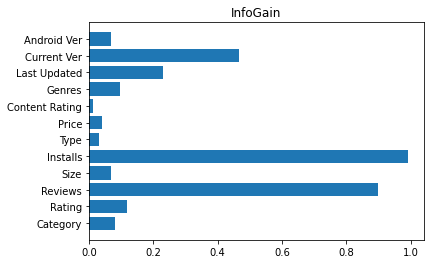

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(len(infogain)),infogain.values())
plt.yticks(range(len(infogain)),infogain.keys())
plt.title('InfoGain')
plt.show()

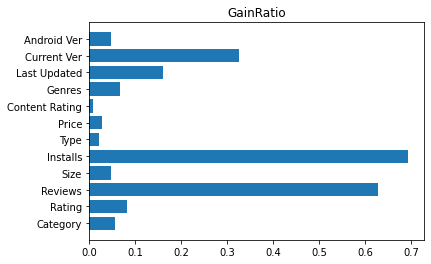

In [ ]:
plt.barh(range(len(gainratio)),gainratio.values())
plt.yticks(range(len(gainratio)),gainratio.keys())
plt.title('GainRatio')
plt.show()

刪除欄位

In [ ]:
data = data.drop(labels=['Type', 'Content Rating'],axis=1)  

In [ ]:
data

,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver
0,0,4.1,-0.151903,0,1,0.0,9,561,2582,8
1,0,4.4,-0.069683,0,2,0.0,9,635,2582,30
2,1,4.6,-0.158129,0,1,0.0,12,635,2582,30
3,1,4.0,-0.163106,1,1,0.0,12,160,127,6
4,1,4.3,-0.150767,0,1,0.0,12,635,2582,30
...,...,...,...,...,...,...,...,...,...,...
9355,21,3.8,-0.163272,2,1,0.0,73,469,596,2
9356,11,4.0,-0.163550,2,0,0.0,37,698,107,16
9357,11,4.5,-0.163541,2,0,0.0,37,605,592,16
9358,11,5.0,-0.163551,2,0,0.0,37,651,103,16


# 資料分析

## 四分位圖

<function matplotlib.pyplot.show>

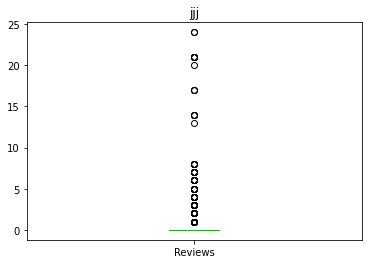

In [ ]:
import matplotlib.pyplot as plt
data['Reviews'] = data['Reviews'].astype('int')
data['Reviews'].plot.box(title = "jjj")
plt.show

## 直方圖

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc952040690>,
      dtype=object)

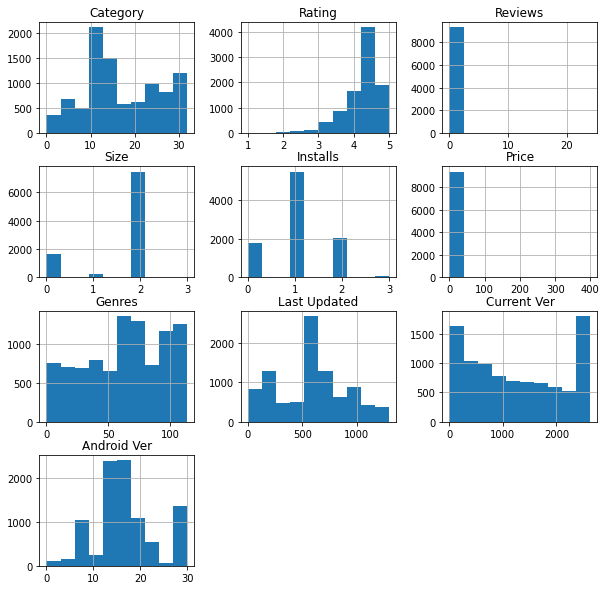

In [ ]:
data.hist(figsize=(10,10))

## 熱圖

              Category    Rating  ...  Current Ver  Android Ver
Category      1.000000 -0.035154  ...     0.117169     0.100259
Rating       -0.035154  1.000000  ...     0.051062     0.076049
Reviews      -0.003838  0.044256  ...     0.076003     0.094746
Size         -0.077393 -0.061234  ...    -0.547988    -0.628218
Installs      0.050867  0.116638  ...     0.360629     0.283706
Price        -0.012920 -0.021919  ...    -0.038008    -0.011531
Genres        0.775995 -0.046871  ...     0.116137     0.106494
Last Updated -0.034423 -0.075401  ...    -0.126489    -0.133867
Current Ver   0.117169  0.051062  ...     1.000000     0.543889
Android Ver   0.100259  0.076049  ...     0.543889     1.000000

[10 rows x 10 columns]


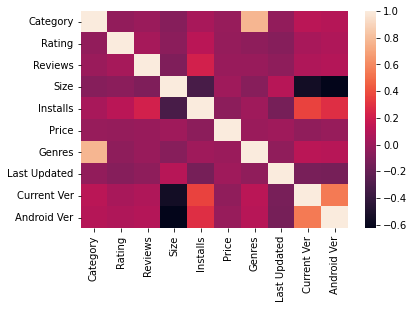

In [ ]:
import seaborn as sbn
cor = data.corr()
print(cor)
_ = sbn.heatmap(cor)

# 資料分割

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['Installs'],axis=1)
y=data.Installs

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=100)
list1=[X_train,X_test,y_train,y_test]
print(list1)

[      Category  Rating  Reviews  ...  Last Updated  Current Ver  Android Ver
3339        11     4.5        0  ...           976          951           12
1253        11     4.2        0  ...           740         1013           16
2419         8     4.6        0  ...           271         2178           12
6377         5     4.8        0  ...           621          511           16
2182         6     4.2        0  ...           360          951            9
...        ...     ...      ...  ...           ...          ...          ...
350         15     4.7        0  ...           748         1640           23
79           6     4.3        3  ...           578         2582           30
8039        28     4.1        0  ...           348          225            5
6936        26     4.0        0  ...           592         2398           16
5640        21     4.7        0  ...           736         1793           16

[6271 rows x 9 columns],       Category  Rating  Reviews  ...  Last Update

#模型

## Decision Tree

In [ ]:
from sklearn import model_selection, tree, metrics
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(metrics.classification_report(y_true=y_test, y_pred=dtc.predict(X_test)))
metrics.confusion_matrix(y_true=y_test, y_pred=dtc.predict(X_test))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       589
           1       0.74      0.70      0.72      1839
           2       0.61      0.67      0.64       648
           3       0.71      0.92      0.80        13

    accuracy                           0.66      3089
   macro avg       0.64      0.70      0.67      3089
weighted avg       0.67      0.66      0.66      3089



array([[ 301,  257,   31,    0],
       [ 292, 1292,  252,    3],
       [  20,  190,  436,    2],
       [   0,    1,    0,   12]])

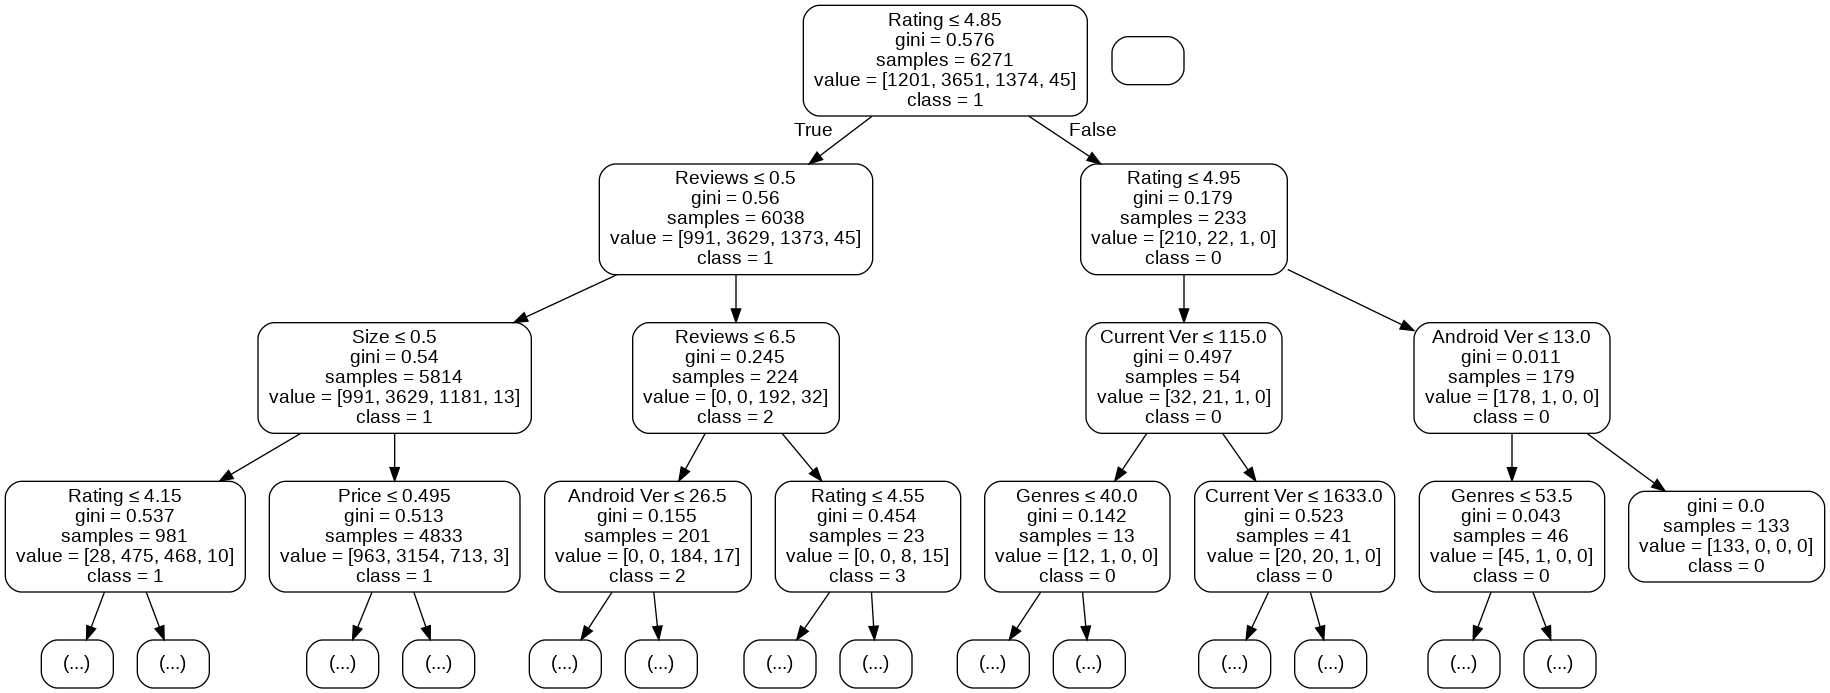

In [ ]:
import pydotplus
from IPython.display import Image

feature_names = ['Category', 'Rating', 'Reviews', 'Size', 'Price', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
traget_name = ['0','1','2','3']
dot_data = tree.export_graphviz(dtc, out_file=None, rounded=True, special_characters=True, feature_names=feature_names, class_names=traget_name, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
tree.export_graphviz(dtc, "tree.dot")
!dot -T svg tree.dot -o gps_tree.svg

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc,accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 300  275   14    0]
 [ 227 1458  154    0]
 [  11  220  412    5]
 [   0    1    0   12]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53       589
           1       0.75      0.79      0.77      1839
           2       0.71      0.64      0.67       648
           3       0.71      0.92      0.80        13

    accuracy                           0.71      3089
   macro avg       0.68      0.72      0.69      3089
weighted avg       0.70      0.71      0.70      3089



In [ ]:
imp=rfc.feature_importances_

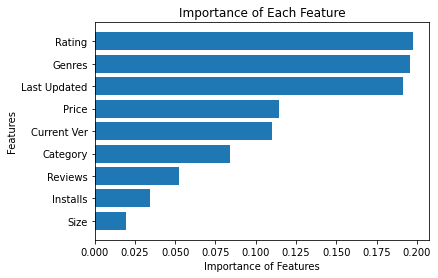

In [ ]:
imp
names=data.columns
zip(imp,names)
imp, names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()

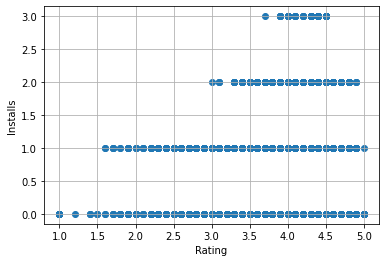

In [ ]:
plt.scatter(data["Rating"],data["Installs"])
plt.xlabel("Rating") #X軸標簽
plt.ylabel("Installs") #Y軸標簽
plt.grid(True)

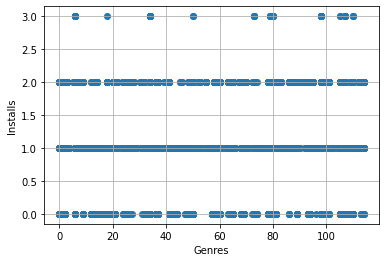

In [ ]:
plt.scatter(data["Genres"],data["Installs"])
plt.xlabel("Genres") #X軸標簽
plt.ylabel("Installs") #Y軸標簽
plt.grid(True)

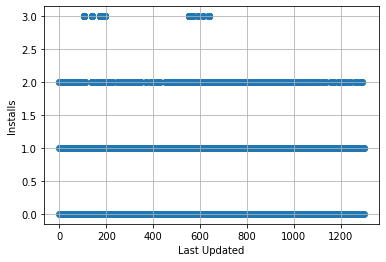

In [ ]:
plt.scatter(data["Last Updated"],data["Installs"])
plt.xlabel("Last Updated") #X軸標簽
plt.ylabel("Installs") #Y軸標簽
plt.grid(True)

## ANN

In [ ]:
import pandas as pd
from sklearn import preprocessing, neural_network, model_selection
mms = preprocessing.MinMaxScaler()
mlp = neural_network.MLPClassifier()
mlp.fit(X_train, y_train)
#mlp.predict([[0, 4.1, 0, 0, 0, 9, 561, 2582, 8]])
mlp.score(X_test, y_test)

0.4250566526383943

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_curve,roc_auc_score,auc,accuracy_score,confusion_matrix,classification_report
import pydotplus
from IPython.display import Image

Text(0, 0.5, 'Error Rate')

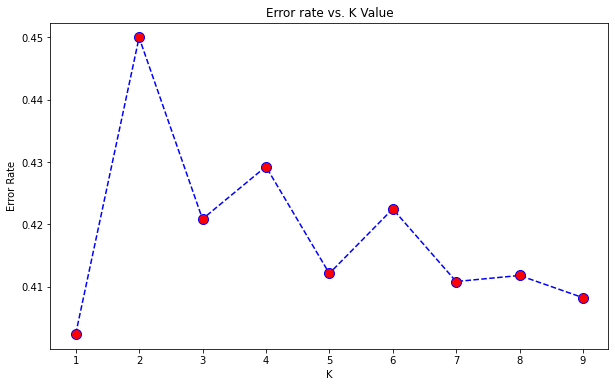

In [ ]:
error_rate=[]

for i in range(1,10):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('WITH k=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=2


[[ 306  265   18    0]
 [ 611 1128   99    1]
 [  68  321  257    2]
 [   0    1    4    8]]


              precision    recall  f1-score   support

           0       0.31      0.52      0.39       589
           1       0.66      0.61      0.63      1839
           2       0.68      0.40      0.50       648
           3       0.73      0.62      0.67        13

    accuracy                           0.55      3089
   macro avg       0.59      0.54      0.55      3089
weighted avg       0.60      0.55      0.56      3089



In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('WITH k=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=9


[[ 147  414   28    0]
 [ 200 1443  196    0]
 [  25  387  235    1]
 [   0    1    9    3]]


              precision    recall  f1-score   support

           0       0.40      0.25      0.31       589
           1       0.64      0.78      0.71      1839
           2       0.50      0.36      0.42       648
           3       0.75      0.23      0.35        13

    accuracy                           0.59      3089
   macro avg       0.57      0.41      0.45      3089
weighted avg       0.57      0.59      0.57      3089



# 結果比較

## ROC

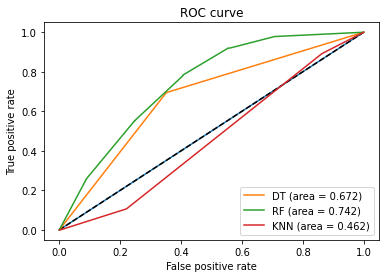

In [ ]:
#roc curve比較各種分類器

#隨機森林
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf, pos_label=1)
auc_rf = auc(fpr_rf, tpr_rf)

#決策樹
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict_proba(X_test)[:,1]
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_pred_dtc, pos_label=1)
auc_dtc = auc(fpr_dtc, tpr_dtc)

#KNN
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn, pos_label=1)
auc_knn = auc(fpr_knn, tpr_knn)


#繪製roc curve
plt.figure(1)
plt.plot([0 ,1], [0, 1],[0, 1], 'k--')
plt.plot(fpr_dtc, tpr_dtc, label='DT (area = {:.3f})'.format(auc_dtc))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_knn, tpr_knn, label='KNN (area = {:.3f})'.format(auc_knn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()